In [17]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
sns.set_style("whitegrid")

<center><img src="https://media.istockphoto.com/vectors/decision-tree-icon-vector-id1094185438?k=20&m=1094185438&s=612x612&w=0&h=GoRnJsnDrkWZXPPTiJojusC_UGP1aVT1g-rO4rUKrzM="></center>
<br>

# Decision Trees
***

The most powerful and widely used tool for categorization and prediction is the decision tree. A non-parametric, supervised learning method, a decision tree is a flowchart-like tree structure in which each internal node represents a test of a quality, each branch reflects the test's conclusion, yes or now, pass or fail, and each leaf or terminal node stores a class label. By separating the source dataset into subgroups based on an attribute value test, a tree can be "trained", the method used to continually repeating the method on all of the subsets is called recursive partitioning. When all of the subsets at a node have the same value of the target variable, or when splitting no longer adds value to the predictions, the recursion is complete. Decision tree classifiers suit exploratory knowledge discovery, due to the lack of need for domain expertise, or parameter setting. They suit high dimensional data and are, in general, quite accurate models.

Within decision trees instances are classified by sorting them down the tree from the root to a leaf node, which provides the classification.
An instance is classified by starting at the root node of the tree, checking the attribute specified by this node, and then progressing along the tree branch according to the attribute value, every time progress is made, we are met with another binary choice (decision) node until  we reach what is known as the leaf node, this is the extremeity of the tree and no further partition will take place.[1]
<br>

<center><img src="https://files.ai-pool.com/a/ec49d6befafe52908fa7bc7c983596a1.png"></center>

<br>

To demonstrate the decision tree process we are first going to synthesis some data and get a handle on how the dcision tree process works. 

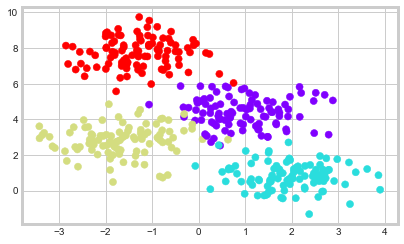

In [2]:
X, y = make_blobs(n_samples=400, centers=4,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A decision tree model, built on the above, will cylce through the data and split it across an axis to assign a label to each part, according to the majority occupier, so a line drawn across the points x= (-4, 6) & y =(6, 6) will be assinged a label of red in the graph. As all items above this line would be correctly classified, there is no need for further subdivide this section, this is our frist leaf node. The next split we could see could be a line from x =(0, 0, 6) to y = (0, 2, 2) and extending right to the edge of our dataset. This would indicate the first two partitions made in the model. Of course not all will be as simple and stright forward as these.

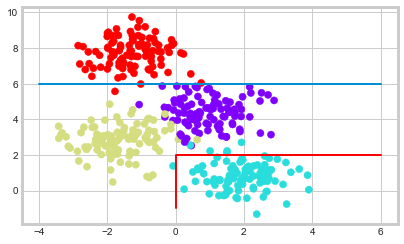

In [3]:
# add line (-4, 6) & (6, 6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.plot([-4, 6], [6, 6], linewidth=2)
plt.plot([0, 0, 6], [-1, 2, 2], 'r-', linewidth=2);

Below we will use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) estimator from Sklearn to fit a decision tree to the mocked up data. I have taken a function to viasualize the estimator, in it's entirety from Jake Vander Plas' website's piece on decision trees, available [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html).

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    #plot xx, yy, Z values
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

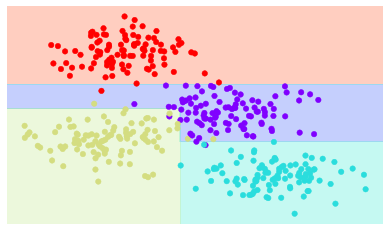

In [5]:
# Let's visualis=ze a depth of 3 first
visualize_classifier(DecisionTreeClassifier(max_depth= 3), X, y)

So our initial 2 lines drawn above were not far off the end product, as at a depth of 3 we can cleary see something along the lines of what we crafted above. As we go to further depths, you can clearly see the complexity of the regions begin to emerge, the thin streak going through the yelllow region and the the purple streaks through the blue. This is an example of over-fitting, and what happening here is that the outliers are causing such constructs. Such over-fitting can lead to a snug fit on the training data, but prove to be quite poor when generalizing unseen data[3]. One method to alleviate the inconsistencies related to over-fitting is to train two or more models on subsets of the same dataset. 

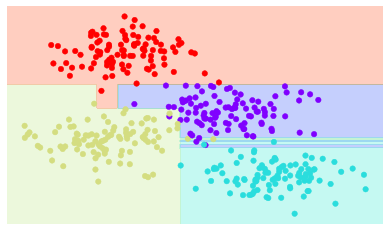

In [6]:
# Let's visualis=ze a depth of 3 first
visualize_classifier(DecisionTreeClassifier(max_depth= 5), X, y)

Below we will explore what the visualisation look like if we split the data up and pass each half as a parameter to our classifier.

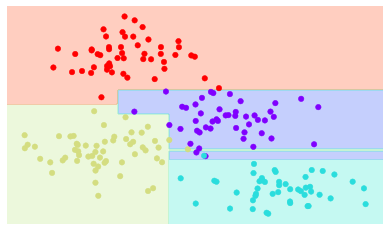

In [7]:
# Split the data in half and visualize
X1, y1 = X[:201], y[:201]
X2, y2 = X[201:], y[201:]

visualize_classifier(DecisionTreeClassifier(max_depth= 5), X1, y1)

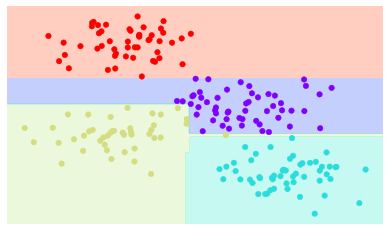

In [8]:
# visualise second half
visualize_classifier(DecisionTreeClassifier(max_depth= 5), X2, y2)

Splitting out the data in this manner can become tedious however, we can see what benefit it could have for seeing where the certainty and uncrtainty could lie for classification. Luckily a concept based on this idea has been around for quite some time. Somewhat similar to what has been completed above, but there are some important differences also. 

<br>

<center><img src="https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/random-forest/img-2.png"></center>

<br>

### Bagging & Random Forrests
***

There are some very strong similarities in the data, which is again, just systhesised, however, as these are two subsets of the same dataset, it is clear that there is some real overlep between both. This concept of multiple groups of over-fit estimators being used to reduce the negative aspects of over-fitting, is called [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html). Bagging is an "ensemble meta- estimator, that fits base classifiers each on a random subset of the original dataset."[4] It introduces randomization into the structure of the subsets, and then makes an ensemble out of it. Using bagging in conjuction to decision trees creates a decision forest. Bagging is short of bootstrap aggregation, and is an ensemble machine learning algorithm, meanong it combines base models into more complex and accurate works. Basically, it is based on the idea of a  bootstrap sample, a sample of a dataset with replacement, which creates multiple samples and in the end reports the statistics of the whole collection of the samples.[5]

In the below code, the randomizer will fit each of the estimators with 75% of the training points. 

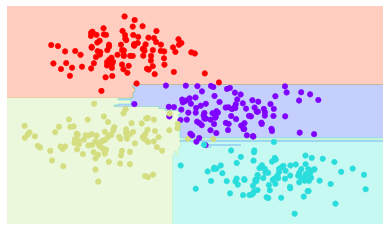

In [9]:
#initialize decision tree
dec_tree = DecisionTreeClassifier()
# create random froest of 50 estimators, taking a 75% share of the overall amount of data
bag = BaggingClassifier(dec_tree, n_estimators=100, max_samples=0.75, random_state=1)

#fit the mdoel
bag.fit(X, y)
#visualize
visualize_classifier(bag, X, y)

While the model looks to fit the dataset much better, I personally am still quite surprised to see that the visualisation still contains stipes across the some of the colour blocks. From reading a bit further, it appears that there may not be sufficient randomness within the selections of the 75% split (100% will still show the same), the [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)[6] is set up to assist with this with an optimized ensemble of randomized decision trees built in.

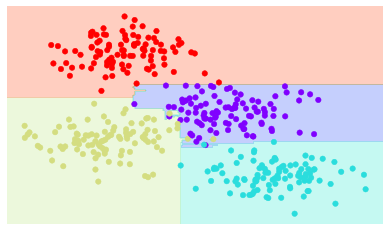

In [10]:
# set the randomforestclassifier up for 100 estimators
randf_model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(randf_model, X, y);

If I was to get out a pencil and a sheet of paper to draw lines seperating each of the blobs into 4 sections, I would think the end result would look somewhat similar to this, much more intuative. So far we have only looked at classification models with decision trees, below I will breifly touch on regression modelling.

### Random Forest Regression
***



References:

    1. https://www.geeksforgeeks.org/decision-tree/
    2. https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html#
    3. https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/
    4. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
    5. https://machinelearningmastery.com/bagging-ensemble-with-python/
    6. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    